Replicate https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1

but using "keras with tensorflow backend" instead of tensorflow directly

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

X [[  5.48813504e-01   7.15189366e-01   3.65816378e-01   2.61627984e-01
    8.45505553e-02   6.45894113e-01]
 [  4.37587211e-01   8.91773001e-01   7.09190581e-01   6.32437012e-01
    6.66350154e-02   5.28894920e-01]
 [  5.68044561e-01   9.25596638e-01   7.92985609e-01   7.33984814e-01
    1.57032938e-01   8.32619846e-01]
 [  7.78156751e-01   8.70012148e-01   6.58530585e-01   5.72929609e-01
    3.56657945e-01   7.80529176e-01]
 [  1.18274426e-01   6.39921021e-01   2.62046963e-01   1.67689360e-01
    6.77524960e-04   4.14661940e-01]
 [  2.64555612e-01   7.74233689e-01   4.64104944e-01   3.59325683e-01
    1.10992866e-02   6.17635497e-01]
 [  6.12095723e-01   6.16933997e-01   2.34809741e-01   1.44862112e-01
    8.72841608e-02   4.37031954e-01]
 [  6.97631196e-01   6.02254716e-02   2.18444256e-04   1.31559083e-05
    1.23151044e-03   1.28926298e-01]
 [  3.15428351e-01   3.63710771e-01   4.81136702e-02   1.74994601e-02
    4.15159042e-03   1.02044811e-01]
 [  2.08876756e-01   1.61309518e-01

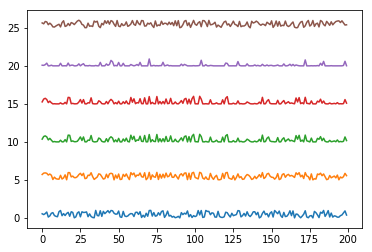

In [2]:
N=100000

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000, n_features:int=5):
    # n_samples, n_features = 2000, 5
    X = np.random.uniform(0, 1, (n_samples, n_features))
    X[:, 2] = X[:, 1]**3
    X[:, 3] = X[:, 1]*X[:, 2]
    X[:, 4] = X[:,1]**2 * X[:, 0]**3
    # auto-encoders need [0-1] range data
    # If PCA input is (mean=0,std=1) and AE is [0-1], MSE is incomparable
    # X = scale(X)
    return X

X = data1(N,6)

print('X',X[0:10,:])

utils.myPlot(X)

## Try AE-20-3

autoencoder
d1,d2 :  6 1


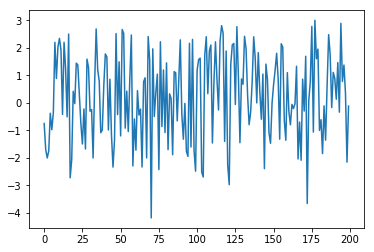

AE mse =  0.375709102741
d1,d2 :  6 2


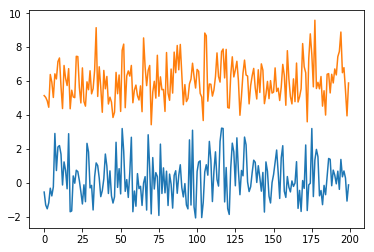

AE mse =  0.25594422057
d1,d2 :  6 3


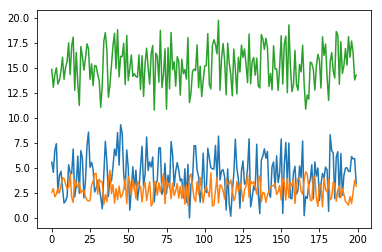

AE mse =  0.0543325953704
d1,d2 :  6 4


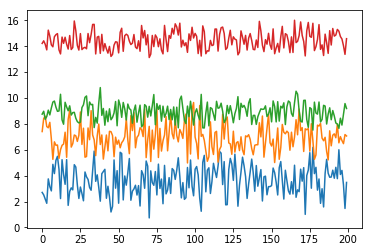

AE mse =  0.0429879993307
d1,d2 :  6 5


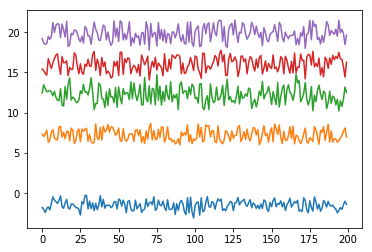

AE mse =  0.0482219725611
d1,d2 :  6 6


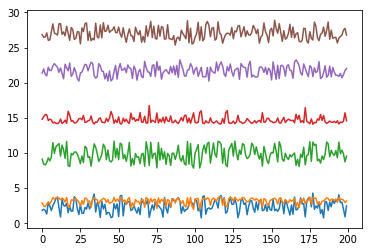

AE mse =  0.0453370961016
d1,d2 :  10 1


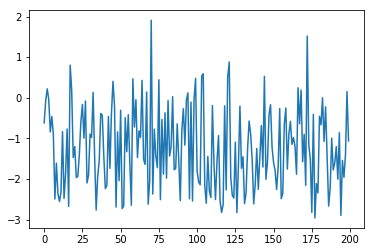

AE mse =  0.375301546334
d1,d2 :  10 2


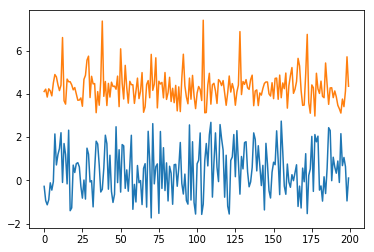

AE mse =  0.270783772791
d1,d2 :  10 3


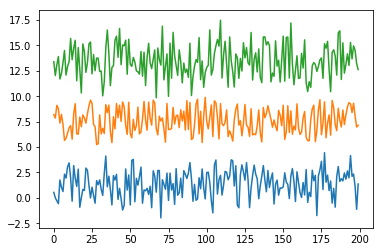

AE mse =  0.0466878751506
d1,d2 :  10 4


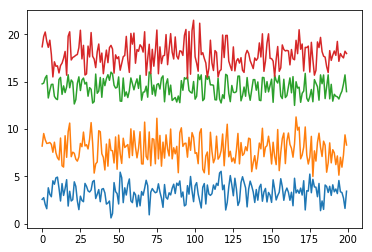

AE mse =  0.0465107688497
d1,d2 :  10 5


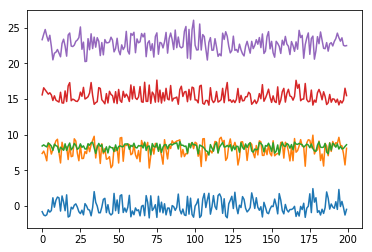

AE mse =  0.0468235816845
d1,d2 :  10 6


In [ ]:
print("autoencoder")
N_epochs = 25
for d1 in [6,10,15,20]:
    for d2 in [1,2,3,4,5,6]:
        autoencoder, encoder = utils.buildNetwork2_deep(X.shape[1], enc_dim1 = d1, enc_dim2 = d2)
        print("d1,d2 : ",d1,d2)
        utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)